# DA24C024: Assignment 5

In [63]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
nursery=pd.read_csv("C:/Users/Mansha/Desktop/IIT-M Sem 1/DAL/nursery.csv",header=None)

In [65]:
nursery.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [66]:
#renaming columns
nursery=nursery.rename(columns={0:'parents',1:'has_nurs',2:'form',3:'children',4:'housing',5:'finance',6:'social',7:'health',8:'class'})

In [67]:
nursery.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [68]:
nursery.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [69]:
nursery['class'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

In [70]:
x=nursery.iloc[:,:8]
x.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority


In [71]:
y=nursery.iloc[:,8]
y.head()

0    recommend
1     priority
2    not_recom
3    recommend
4     priority
Name: class, dtype: object

Converting 5 class problem to 3 class problem

In [72]:
for index, value in y.items():
    if value == 'spec_prior' or value == 'very_recom':
        y[index] = 'recommend'

In [73]:
y.describe()

count         12960
unique            3
top       recommend
freq           4374
Name: class, dtype: object

In [74]:
y.unique()

array(['recommend', 'priority', 'not_recom'], dtype=object)

In [75]:
nursery.dtypes

parents     object
has_nurs    object
form        object
children    object
housing     object
finance     object
social      object
health      object
class       object
dtype: object

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_t, y_train, y_t=train_test_split(x,y,test_size=0.4,random_state=42)
x_test, x_val, y_test, y_val=train_test_split(x_t,y_t,test_size=0.5,random_state=42)

In [77]:
len(y_train)

7776

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()


Encoding categorical data using label encoder

In [79]:
label_encoder = LabelEncoder()
y_train_cat, y_test_cat, y_val_cat= label_encoder.fit_transform(y_train), label_encoder.fit_transform(y_test), label_encoder.fit_transform(y_val)
x_train_cat, x_test_cat, x_val_cat= x_train, x_test, x_val

l=['parents','has_nurs','form','housing','finance','children','social','health']
for i in l:
    x_train_cat[i], x_test_cat[i], x_val_cat[i]= label_encoder.fit_transform(x_train_cat[i]), label_encoder.fit_transform( x_test_cat[i]), label_encoder.fit_transform(x_val_cat[i])


Defining a function for computing accuracies since we'd need it multiple times.

In [80]:
from sklearn.model_selection import GridSearchCV
def compute_accuracy(model, x_train, y_train, x_test, y_test, num_runs=5):
    accuracies = []
    for _ in range(num_runs):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)  
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

For each model, we'd create a parameter grid for parameters to tune using GridSearchCV on the validation set. Then we'd use the parameters that give the best performance and fit the model on the training data. We test this model on the test data in 5 iterations and compute accuracy for each iteration.

Decision Tree with categorical variables.

In [81]:
param_grid_dt = param_grid_dt = {'max_depth': list(np.arange(2, 99, 1)),               
    'min_samples_split': list(np.arange(2, 21, 1)),  
    'criterion': ['gini', 'entropy']      }               

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(x_val_cat, y_val_cat)  
accuracies_dt_cat = compute_accuracy(grid_dt.best_estimator_, 
                                           x_train_cat, y_train_cat, x_test_cat, y_test_cat)
mean_dt_cat=np.mean(accuracies_dt_cat)
var_dt_cat=np.var(accuracies_dt_cat)


In [82]:
err_dt_cat=[min(accuracies_dt_cat),max(accuracies_dt_cat)]


Decision Tree with one-hot encoding

In [83]:
one_hot_encoder = OneHotEncoder()
x_train_enc,x_test_enc,x_val_enc= one_hot_encoder.fit_transform(x_train),one_hot_encoder.fit_transform(x_test),one_hot_encoder.fit_transform(x_val)

In [84]:
param_grid_dt = param_grid_dt = {'max_depth': list(np.arange(2, 99, 1)),               
    'min_samples_split': list(np.arange(2, 21, 1)),  
    'criterion': ['gini', 'entropy']      }       

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(x_val_enc, y_val)  
accuracies_dt = compute_accuracy(grid_dt.best_estimator_, 
                                           x_train_enc, y_train, x_test_enc, y_test)
mean_dt=np.mean(accuracies_dt)
var_dt=np.var(accuracies_dt)


In [85]:
print(accuracies_dt,mean_dt,var_dt)
err_dt=[min(accuracies_dt),max(accuracies_dt)]


[0.9922839506172839, 0.9918981481481481, 0.9922839506172839, 0.9922839506172839, 0.9922839506172839] 0.9922067901234568 2.3814967230601872e-08


Logistic Regression with L1 regularization

In [86]:
param_grid_lr = {
    'C': [ 0.01, 0.1, 1, 10, 100, 1000],          
    'solver': ['liblinear','saga'],        
    'penalty': ['l1'],                      # L1 regularization
    
}
# Perform grid search with 5-fold cross-validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(x_val_enc, y_val_cat) 

accuracies_lr = compute_accuracy(grid_lr.best_estimator_,  x_train_enc, y_train_cat,  x_test_enc, y_test_cat)
mean_lr,var_lr=np.mean(accuracies_lr),np.var(accuracies_lr)
print(mean_lr,var_lr)

c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

0.9143518518518519 0.0


In [87]:
err_lr=[min(accuracies_lr),max(accuracies_lr)]

In [88]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

K-Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter grid for k-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': np.arange(1,11,2),         # Number of neighbors
    'weights': ['uniform', 'distance'],      
    'metric': ['euclidean', 'manhattan']      
}

# Perform grid search with 5-fold cross-validation
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(x_val_cat, y_val_cat)  


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 3, 5, 7, 9]),
                         'weights': ['uniform', 'distance']})

In [90]:
accuracies_knn = compute_accuracy(grid_knn.best_estimator_, 
                                             x_train_cat, y_train_cat, 
                                             x_test_cat, y_test_cat)
mean_knn,var_knn=np.mean(accuracies_knn),np.var(accuracies_knn)
# Output results
print(accuracies_knn,mean_knn,var_knn)
err_knn=[min(accuracies_knn),max(accuracies_knn)]


[0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444] 0.9444444444444444 0.0


Hard-coding results of other classifiers from website

In [1]:
mean_logistic=92.53
err_logistic=[1.203,0.587] #[deviation on left, deviation on right]
mean_nn=100
err_nn=[0,0]
mean_rf=98.025
err_rf=[0.494,0.463]
mean_svc=99.196
err_svc=[0.307,0.279]
mean_xgb=99.969
err_xgb=[0.062,0.031]

Performance on test data:

In [92]:
x_e = np.array([mean_dt*100,mean_dt_cat*100,mean_lr*100,mean_knn*100,mean_logistic,mean_rf,mean_nn,mean_svc,mean_xgb])
y_e = ['Decision tree (categorical)','Decision tree (one-hot)','Logistic Regression with L1 reg','kNN','Logistic Regression','Random Forest','Neural Networks','Support Vector Classifier','XGBoost']
print("Model: Accuracy")
for i in range (len(x_e)):
    print(y_e[i],':',x_e[i])

Model: Accuracy
Decision tree (categorical) : 99.22067901234568
Decision tree (one-hot) : 99.10493827160494
Logistic Regression with L1 reg : 91.43518518518519
kNN : 94.44444444444444
Logistic Regression : 92.53
Random Forest : 98.025
Neural Networks : 100.0
Support Vector Classifier : 99.196
XGBoost : 99.969


Error plot with means and variances across models. As on website the right and left deviation is not same, we obtain variances by averaging deviation on the right and the left.

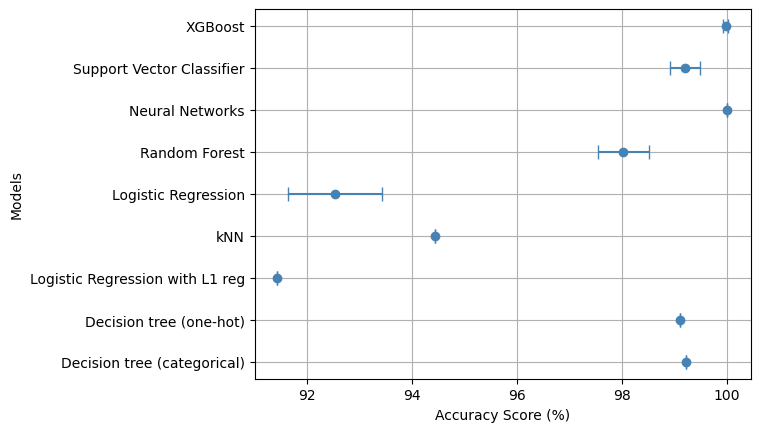

In [94]:
variances = [var_dt,var_dt_cat,var_lr,var_knn,np.mean(err_logistic),np.mean(err_rf),np.mean(err_nn),np.mean(err_svc),np.mean(err_xgb)]
plt.errorbar(x_e, y_e, xerr=variances, fmt='o',capsize=5, capthick=1, color='steelblue')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Models')
plt.grid(True) 
plt.show()

# TASK 2

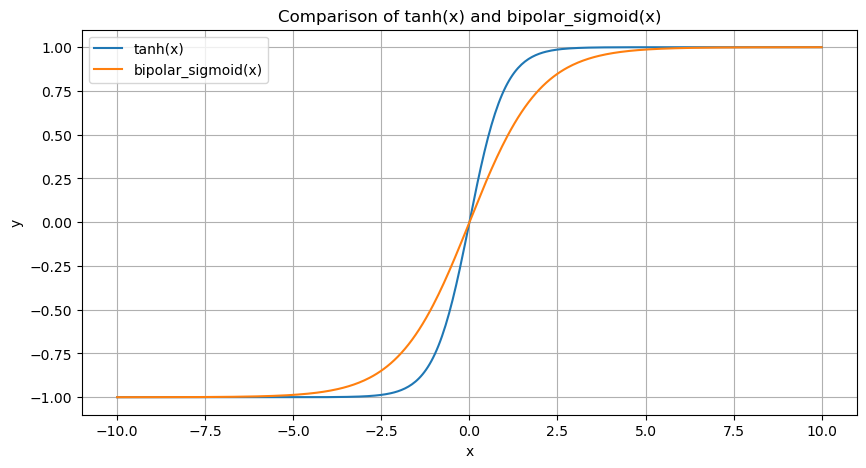

In [95]:

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#bipolar sigmoid function
def bipolar_sigmoid(x):
    return 2 * sigmoid(x) - 1

#parameterized bipolar sigmoid function
def bipolar_sigmoid_param(a, x):
    return 2 * sigmoid(a * x) - 1

#parameterized tanh function
def tanh_param(a, x):
    return np.tanh(a * x)
    
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]

# Range of x values
x_values = np.linspace(-10, 10, 400)

tanh_y = np.tanh(x_values)
bipolar_sigmoid_y = bipolar_sigmoid(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, tanh_y, label='tanh(x)')
plt.plot(x_values, bipolar_sigmoid_y, label='bipolar_sigmoid(x)')
plt.legend()
plt.title('Comparison of tanh(x) and bipolar_sigmoid(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



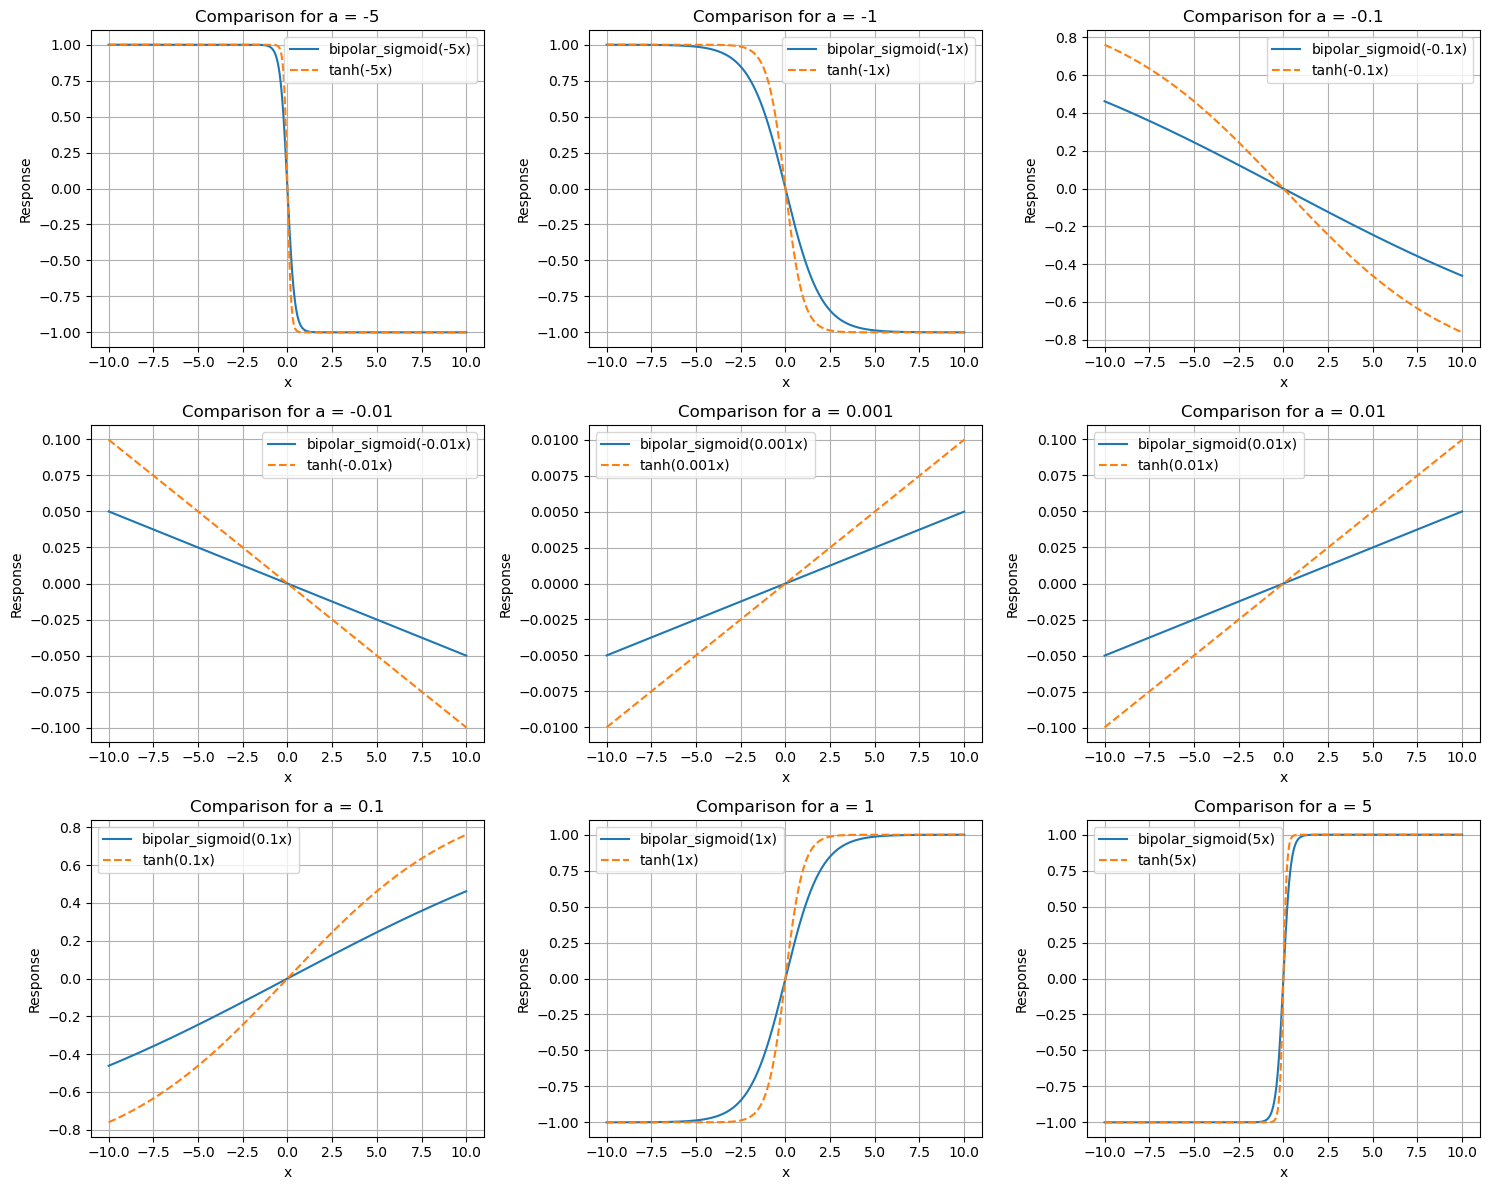

In [96]:
plt.figure(figsize=(15,12))
for a in a_values:
    plt.subplot(3, 3, a_values.index(a) + 1)
    plt.plot(x_values, bipolar_sigmoid_param(a, x_values), label=f'bipolar_sigmoid({a}x)')
    plt.plot(x_values, tanh_param(a, x_values), label=f'tanh({a}x)', linestyle='--')
    plt.title(f'Comparison for a = {a}')
    plt.xlabel('x')
    plt.ylabel('Response')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

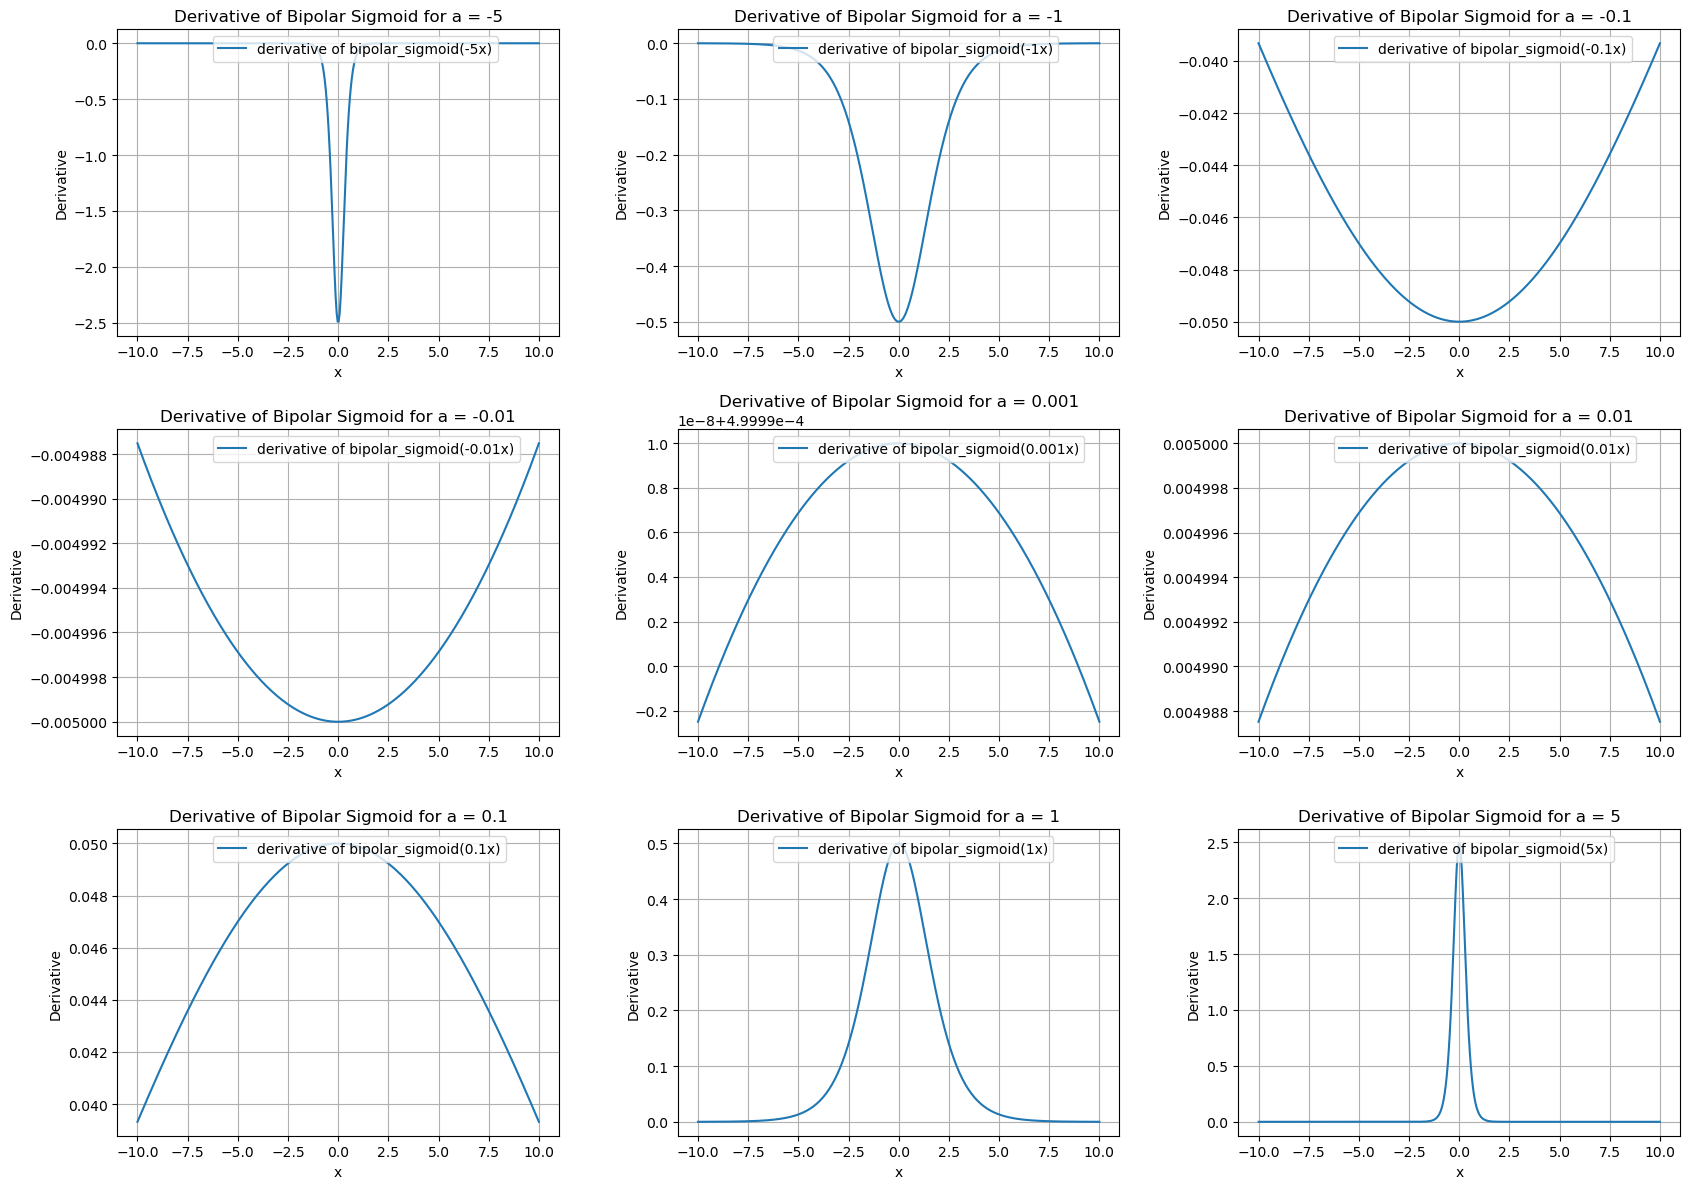

In [97]:
# derivative of the bipolar sigmoid to estimate the linear range
def derivative_bipolar_sigmoid(a, x):
    return (2 * a * sigmoid(a * x) * (1 - sigmoid(a * x)))

# Plot the derivative of bipolar_sigmoid(ax) for different values of 'a'
plt.figure(figsize=(17, 12))

for a in a_values:
    plt.subplot(3, 3, a_values.index(a) + 1)
    plt.plot(x_values, derivative_bipolar_sigmoid(a, x_values), label=f'derivative of bipolar_sigmoid({a}x)')
    plt.title(f'Derivative of Bipolar Sigmoid for a = {a}')
    plt.xlabel('x')
    plt.ylabel('Derivative')
    plt.legend(bbox_to_anchor=(0.2, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()


The linear range of a function is where the derivative is approximately constant and non-zero, not where it is zero (flat). For large values of a, the bipolar sigmoid transitions quickly with a steep slope, leading to a narrow linear range around x = 0. Conversely, small values of a result in a gentler, more spread-out transition, creating a wider linear range. Therefore, the function behaves more linearly over a broader range when a is small and less linearly when a is large.